In [2]:
!pip install pytrends

# Implementation
## Connecting to Google
You must connect to Google first because, after all, we are requesting the Google trending topics from Google Trends. **For this, we need to import the method called `TrendReq` from `pytrends.request` library.** Also, I will import the `pandas` library to store and visualize the data, which you see in the later tutorial.

In [3]:
import pandas as pd                        
from pytrends.request import TrendReq
pytrend = TrendReq()

## Interest By Region
Let us see the terms which are popular in the region worldwide. I will choose, the term to be searched as “Taylor Swift”.

In [6]:
pytrend.build_payload(kw_list=['Taylor Swift'])
# Interest by Region
df = pytrend.interest_by_region()
df.head(10)

,Taylor Swift
geoName,
Afghanistan,0
Albania,0
Algeria,15
American Samoa,0
Andorra,0
Angola,0
Anguilla,0
Antarctica,0
Antigua & Barbuda,0


## Now you might be thinking what are the values, what do they denote?
The values are calculated on a scale from 0 to 100, where 100 is the location with the most popularity as a fraction of total searches in that location, a value of 50 indicates a location which is half as popular. A value of 0 indicates a location where there was not enough data for this term.   
### Source →[Google Trends](https://support.google.com/trends/answer/4355212).


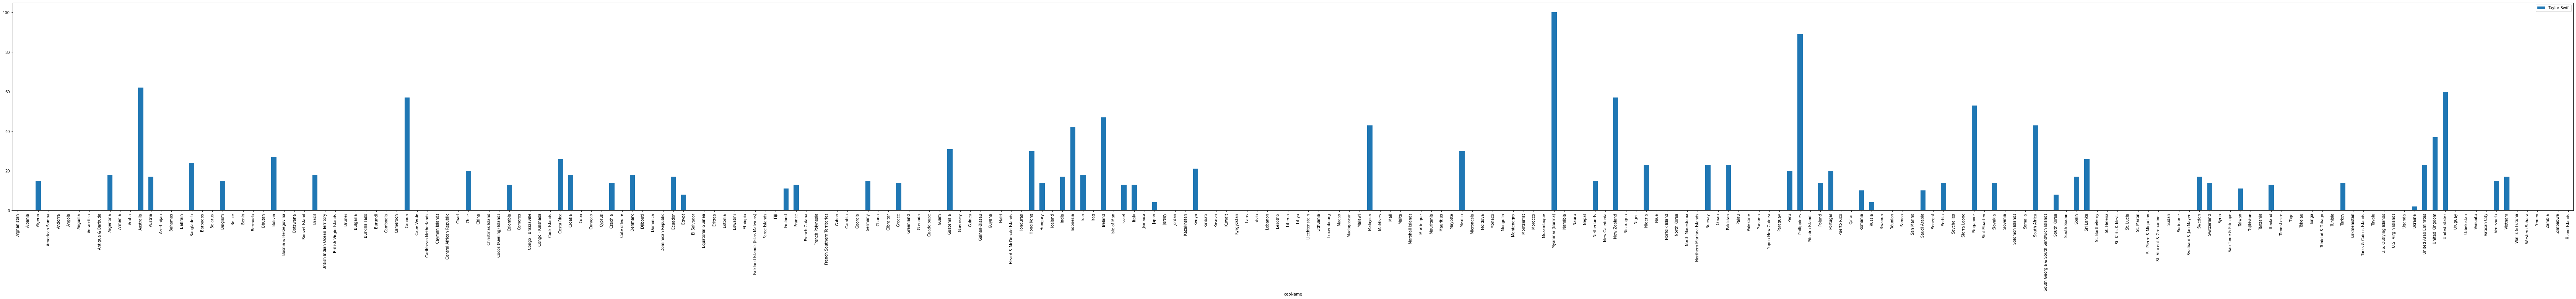

In [8]:
df.reset_index().plot(x='geoName', y='Taylor Swift', figsize=(120, 10), kind ='bar')

## Daily Search Trends
Now let us get the top daily search trends worldwide. To do this we have to use the `trending_searches()` method. **If you want to search worldwide just don’t pass any parameter.**

In [11]:
# Get Google Hot Trends data
df = pytrend.trending_searches(pn='united_states')
df.head()

,0
0,Charlie Daniels
1,Patrick Mahomes
2,Tesla stock
3,Ennio Morricone
4,Mandy Moore


## Top Charts
Let was see what was trending in 2019. With the help of `top_charts` method we can get the top trending searches yearly.

In [12]:
# Get Google Top Charts
df = pytrend.top_charts(2019, hl='en-US', tz=300, geo='GLOBAL')
df.head()

,title,exploreQuery
0,India vs South Africa,
1,Cameron Boyce,
2,Copa America,
3,Bangladesh vs India,
4,iPhone 11,


## Google Keyword Suggestions
Let us see how can we obtain google’s keyword suggestion. If you don’t know what I’m talking about. The below image explains things more clear.
![img](https://miro.medium.com/max/1400/1*QRpWWBS1SHXBr71Jp1NwQA.png)

In [13]:
# Get Google Keyword Suggestions
keywords = pytrend.suggestions(keyword='Mercedes Benz')
df = pd.DataFrame(keywords)
df.drop(columns= 'mid')   # This column makes no sense

,title,type
0,Mercedes-Benz,Luxury vehicles company
1,Mercedes-Benz A-Class,Compact car
2,Mercedes-Benz E-Class,Luxury vehicle
3,Mercedes-Benz S-Class,Luxury vehicle
4,Mercedes-Benz M-Class,SUV


## Related Queries
It's a common thing that when a user searches for a topic, they would also search for something related. These are called related queries. Let us see what are the related queries for the topic “Coronavirus”. Always remember when you want to change the topic name just run the following code again with the new name as the parameter.

In [14]:
pytrend.build_payload(kw_list=['Coronavirus'])

Now let’s run the method `related_queries` which returns a dictionary full of related queries for the topic “Coronavirus”

In [15]:
# Related Queries, returns a dictionary of dataframes
related_queries = pytrend.related_queries()
related_queries.values()

dict_values([{'top':                             query  value
0              coronavirus update    100
1               coronavirus cases     79
2                news coronavirus     67
3                          corona     64
4                  uk coronavirus     55
5               india coronavirus     50
6                  el coronavirus     46
7            coronavirus symptoms     45
8   thank you coronavirus helpers     44
9                coronavirus tips     41
10                coronavirus map     34
11                coronavirus usa     34
12              coronavirus world     32
13                   corona virus     30
14                 coronavirus us     30
15             italia coronavirus     28
16             france coronavirus     28
17              china coronavirus     28
18              coronavirus china     28
19               coronavirus live     26
20             coronavirus deaths     26
21             españa coronavirus     25
22           coronavirus in india   

Similarly, you can also search for the related topics just run the below code to do so:

In [18]:
# Related Topics, returns a dictionary of dataframes
related_topic = pytrend.related_topics()
related_topic.values()

dict_values([{'rising':     value  ...                                 topic_type
0  134300  ...                                    Website
1   64800  ...                                      Topic
2   50450  ...  Private university in Baltimore, Maryland
3   27350  ...                              City in China
4   24050  ...                                      Topic
5    3800  ...                          Country in Europe
6    2900  ...                                    Country
7    1250  ...                                 Discipline
8     600  ...                                      Topic

[9 rows x 6 columns], 'top':     value  ...                                 topic_type
0     100  ...                                      Virus
1       5  ...                                      Topic
2       4  ...                                      Topic
3       3  ...                          Country in Europe
4       2  ...                           Infectious agent
5       2  ...    